# 4.1. Sự đánh đổi giữa độ chệch và phương sai

Gỉa sử chúng ta có một tập dữ liệu huấn luyện gồm $n$ điểm $D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n) \}$ và một hàm huấn luyện được ước lượng từ tập huấn luyện là $\hat{f}(x; D)$. Ở đây ký hiệu $\hat{f}(x; D)$ để thể hiện rằng hàm này được hồi qui dựa vào tập dữ liệu huấn luyện $D$. Kỳ vọng của chúng ta là hàm $\hat{f}(x; D)$ sẽ gần xấp xỉ hàm thực tế là $f(x)$. Hàm $f(x)$ biểu diễn mối quan hệ **thực** giữa $x$ và $y$. Đồng thời chúng ta chấp nhận một phần sai số nhiễu $\epsilon$ giữa hàm $f(x)$ và giá trị ground truth $y$. Đây là phần sai số **luôn luôn** tồn tại giữa mô hình dự báo và grouth truth. Hay nói cách khác, bất kì mô hình nào cũng sẽ có sai số nếu như dữ liệu là ngẫu nhiên và mối quan hệ giữa đầu vào $\mathbf{X}$ và đầu ra $\mathbf{y}$ không được sinh ra bởi một hàm số được chủ định trước. Chính vì không thể tránh khỏi nên sai số này được coi như là một thành phần sai số không thể giảm bớt (_irreducible error_). Chúng ta giả định chúng như là thành phần nhiễu có kỳ vọng bằng 0 và phương sai là $\sigma_{\epsilon}^2$. Như vậy:

$$y_i = f(x_i) + \epsilon_i$$

**Tổng bình phương sai số** giữa giá trị dự báo $\hat{f}(x; D)$ và giá trị thực tế $y$ được biểu diễn qua tổng của độ chệch (_bias_) và phương sai (_variance_) như sau:

$$\mathbf{E}{[(y-\hat{f}(x; D))^2]} = \underbrace{\mathbf{E}[(\hat{f}(x; D)-f(x))^2]}_{\text{bias error}}+ \underbrace{\mathbf{E}[(\hat{f}(x; D)-\mathbf{E}(\hat{f}(x; D)))^2]}_{\text{variance error}} + \underbrace{\sigma^2_{\epsilon}}_{\text{irreduciable error}} \tag{1}$$

Thật vậy, để chứng minh công thức $(1)$ chúng ta dựa trên hằng đẳng thức:

$$(a+b+c)^2 = a^2+b^2+c^2+2ab+2bc+2ac$$

Bên dưới là cách chứng minh đẳng thức $(1)$ dành cho bạn nào muốn hiểu sâu:

$$\begin{eqnarray}
\mathbf{E}[(y-\hat{f}(x; D))^2] & = & \mathbf{E}[(f(x)+\epsilon - \hat{f}(x; D))^2] \\
& = & \mathbf{E}[(~\underbrace{f(x)-\mathbf{E}[{\hat{f}(x; D)}]}_{a}+ \underbrace{\mathbf{E}[{\hat{f}(x; D)}]- \hat{f}(x; D)}_{b}+\underbrace{\epsilon}_{c}~)^2] \\
& = & \mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2 + (\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2 + \epsilon^2 + \\ 
& ~ & 2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D)])+2(f(x)+\epsilon-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] \\
& = & \mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2] + \mathbf{E}[(\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2] + \mathbf{E}(\epsilon^2) + \\
& ~ & \underbrace{\mathbf{E}[2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D)])]}_{0}+\underbrace{\mathbf{E}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))]}_{0} \\
& = & \underbrace{\mathbf{E}[(f(x)-\mathbf{E}[\hat{f}(x; D)])^2]}_{\text{bias error}} + \underbrace{\mathbf{E}[(\hat{f}(x; D)-\mathbf{E}[\hat{f}(x; D)])^2]}_{\text{variance error}} + \sigma_{\epsilon}^2
\end{eqnarray}$$

Mặt khác do $\epsilon$ được coi như thành phần nhiễu nên độc lập với $f(x)$ và $\hat{f}(x; D)$. Như vậy áp dụng công thức kỳ vọng tích bằng tích các kỳ vọng đối với các biến độc lập ta thu được một đẳng thức khá quan trọng: $\mathbf{E}[2\epsilon(f(x)-\mathbf{E}[\hat{f}(x; D)])]=2\mathbf{E}(\epsilon)\mathbf{E}[f(x)-\mathbf{E}(\hat{f}(x; D))] = 0$. 

Ngoài ra:

$$\begin{eqnarray}\mathbf{E}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] & = & \mathbf{E}_{x, y, D}[2(y-\mathbf{E}[\hat{f}(x; D)])(\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D))] \\
& = & \mathbf{E}_{x, y}[2(y-\mathbf{E}[\hat{f}(x; D)])\underbrace{\mathbf{E}_{D}[\mathbf{E}[\hat{f}(x; D)]-\hat{f}(x; D)]}_{0} = 0\end{eqnarray}$$

Như vậy từ dòng 4 suy ra đẳng thức ở dòng 5 và thu được công thức $(1)$.

Công thức $(1)$ còn được gọi là công thức **phân rã độ chệch-phương sai** (_bias-variance decomposition_). Thành phần phương sai nhiễu $\sigma_{\epsilon}^2$ có độ lớn không đáng kể nên ta có thể xem như **tổng bình phương sai số** chỉ phục thuộc phần lớn vào _độ chệch_ và _phương sai_. Sự đánh đổi giữa _độ chệch_ và _phương sai_ thể hiện qua: `đối với các mô hình có cùng mức độ sai số, nếu muốn một mô hình dự báo ít chệch hơn thì sẽ cần phương sai lớn hơn và ngược lại`.

Kết quả của một mô hình machine learning có thể rơi vào một trong bốn trường hợp giữa _độ chệch_ và _phương sai_ như hình bên dưới.

<!-- ![](https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg) -->
![](imgs/bias-and-variance.jpg)

**Hình 1:** Các khả năng về _độ chệch_ và _phương sai_ của mô hình. Trong hình giả sử các điểm màu xanh là phân phối của giá trị dự báo và vòng tròng màu đỏ ở giữa thể hiện vùng lõi của phân phối ground truth, nơi mà các điểm ground truth có mật độ tập trung cao. Như vậy các mô hình có thể rơi vào:

* Độ chệch thấp, phương sai thấp (_Low bias, Low Variance_): Đây là trường hợp mô hình khớp tốt vì phân phối của giá trị dự báo trùng với phân phối của ground truth.

* Độ chệch cao, phương sai cao (_Low Bias, High Variance_): Đây là trường hợp các giá trị dự báo sẽ giao động qua lại xung quanh ground truth. Thông thường trường hợp này sẽ xảy ra hiện tượng quá khớp (_overfitting_) mà chúng ta sẽ tìm hiểu sau.

* Độ chệch cao, phương sai thấp (_High Bias, Low Variance_): Đây là trường hợp mô hình dự báo bị chệch, phân phối của giá trị dự báo nằm khác xa so với phân phối của ground truth. Thông thường xảy ra khi lớp mô hình quá đơn giản. Các mô hình có đặc điểm này thường bị vị khớp (_underfitting_).

* Độ chệch cao, phương sai cao (_High Bias, High Variance_): Đặc điểm này thường thấy ở những mô hình kém khi nó vừa bị chệch và vừa dao động. Trong trường hợp này mô hình cũng bị vị khớp.

Độ chệch và phương sai là những nguyên nhân trực tiếp dẫn tới hai hiện tượng _quá khớp_ và _vị khớp_. Khi đó mô hình sẽ không thể sử dụng trong thực tế vì tính kém chính xác của chúng khi dự báo trên những tập dữ liệu mới, chúng ta sẽ phải tìm cách khắc phục chúng. Tiếp theo chúng ta cùng tìm hiểu _quá khớp_ và _vị khớp_ là gì và phương pháp khắc phục chúng.

# 4.2. Quá khớp (_Overfitting_) và vị khớp (_Underfitting_)


Quá khớp (_Overfitting_) và vị khớp (_underfitting_) là những hiện tượng ảnh hưởng nghiêm trọng đến hiệu suất của mô hình khiến chúng không thể áp dụng được vào thực tế.

Để minh hoạ cho hiện tượng quá khớp và vị khớp chúng ta sẽ cùng lấy ví dụ thực tiễn về phân loại ảnh chó và mèo. Giả sử tập dữ liệu huấn luyện của bạn thu thập được bao gồm 9000 ảnh chó mèo từ các tập dataset của Việt Nam. Sau đó bạn lên mạng và download thêm 1000 ảnh chó mèo của nước ngoài làm tập kiểm tra.

**Quá khớp**

Bạn xây dựng một mô hình phân loại có độ chính xác đạt 90% trên tập huấn luyện nhưng chỉ 50% trên tập kiểm tra. Như vậy mô hình của bạn đang xảy ra hiện tượng _quá khớp_.

Khi nói đến _quá khớp_ là ta nói đến trường hợp mô hình dự báo tốt trên tập huấn luyện nhưng không dự báo tốt trên tập kiểm tra. Trong trường hợp quá khớp thì mô hình chỉ học tốt trên những tập dữ liệu có cùng phân phối với tập dữ liệu huấn luyện. Đối với các trường hợp khác phân phối với tập huấn luyện mà nó chưa được học, ví dụ như tập kiểm tra khác phân phối, thì sẽ không được dự báo tốt.

<!-- ![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/Overfitting2.png) -->
![](imgs/overfitting.png)

**Hình 2:** Ví dụ về _quá khớp_ (ngoài cùng bên phải), _vị khớp_ (đầu tiên) và _vừa vặn_ (ở giữa). Đường biên phân chia của mô hình _quá khớp_ có xu hướng phân loại tốt **mọi điểm** dữ liệu nhưng đó là một đường biên rất phức tạp (thể hiện yếu tố phương sai cao) và không khái quát về hình dạng như đường biên phân chia ở hình chính giữa. Trái lại, đường biên của mô hình _vị khớp_ thì quá đơn giản (thể hiện yếu tố phương sai thấp) và do đó dẫn tới phân loại sai nhiều điểm dữ liệu. Trong cả ba mô hình thì đường biên phân chia ở giữa là có xu hướng phân chia một cách **tổng quát** và **chính xác** trên dữ liệu huấn luyện lẫn kiểm tra. Đây là mô hình có độ chệch thấp và phương sai thấp.

**Vị khớp**

Trong một kịch bản khác, mô hình của bạn đạt chính xác 55% trên tập huấn luyện và 50% trên tập kiểm tra. Kết quả này là kém trên cả hai tập và ta kết luận mô hình đang xảy ra _vị khớp_.

Vị khớp là hiện tượng mà mô hình dự báo **kém** trên đồng thời cả tập huấn luyện và tập kiểm tra như hình ngoài cùng bên trái. Thông thường những mô hình quá đơn giản khi dự báo trên tập dữ liệu lớn thường dẫn tới hiện tượng vị khớp. Một mô hình vị khớp thì sẽ có độ chệch lớn nên các dự báo sẽ không thể chính xác và dẫn tới không thể áp dụng được mô hình vào thực tế. Lúc này chúng ta cần có chiến lược cải thiện mô hình trên cả hai khía cạnh **lựa chọn mô hình tốt** và **cải thiện dữ liệu**.

## 4.2.1. Nguyên nhân của quá khớp và vị khớp 

Nguyên nhân của _quá khớp_ có thể xuất phát từ mô hình quá phức tạp hoặc dữ liệu chưa đủ khái quát. 

Những mô hình quá phức tạp thường có không gian biểu diễn lớn và dễ dàng khớp được những đường biên phân chia phức tạp. Điều này tưởng như là tốt cho quá trình dự báo nhưng hoá ra là không tốt vì mô hình phức tạp thì có xu hướng học chi tiết thay vì học qui luật tổng quát như những gì bạn đã thấy ở hình 2.

Hiện tượng _quá khớp_ xuất phát từ dữ liệu cũng là hiện tượng khá phổ biến. Khi dữ liệu không đủ rộng và khái quát thì mô hình không thể dự báo tốt trên tập huấn luyện là những dữ liệu mà nó chưa được học. Lấy ví dụ về tác vụ phân loại ảnh chó và mèo ở trên. Trong dữ liệu huấn luyện hầu hết là ảnh các chú chó và mèo của Việt Nam nhưng trong dữ liệu kiểm tra lại là ảnh của những giống chó và mèo nước ngoài làm cho mô hình không dự báo đúng trên tập dữ liệu này.

Hiện tượng _vị khớp_ cũng có thể xuất phát từ phía mô hình hoặc từ phía dữ liệu. Đối với những bộ dữ liệu lớn nhưng sử dụng mô hình quá nhỏ thì sẽ không đủ khả năng biểu diễn tốt dữ liệu. Chẳng hạn như hình ngoài cùng bên trái của hình 2 nếu chỉ sử dụng đường biên là một đường thẳng tuyến tính giản đơn thì không đủ sức mạnh để phân loại dữ liệu. Khi đó ta cần chuyển sang những lớp mô hình phức tạp hơn.

Dữ liệu không đủ đa dạng cũng là nguyên nhân dẫn tới hiện tượng **vị khớp**. Như trong ví dụ, để phân loại được ảnh chó và mèo nước ngoài thì chúng ta cần bổ sung thêm những dữ liệu mới vào tập huấn luyện chỉ gồm ảnh chó và mèo của Việt Nam. Quá trình bổ sung dữ liệu này cần phải được thực hiện định kỳ và liên tục trong suốt quá trình huấn luyện và áp dụng mô hình.

## 4.2.2. Ví dụ về quá khớp và vị khớp

Mục đích của ví dụ này nhằm chỉ ra cách sấp xỉ các hàm phi tuyến bằng phương pháp hồi qui đa thức (_Linear regression with Polynormial feature_) và mối liên hệ giữa sự thay đổi độ phức tạp đa thức dẫn tới các hiện tượng _quá khớp_ và _vị khớp_ như thế nào. Cụ thể chúng ta sẽ chỉ ra rằng khi mức độ phức tạp của các phương trình hồi qui đa thức càng gia tăng (tức bậc của đa thức càng cao) thì mô hình có xu hướng bị _quá khớp_. Đồng thời một phương trình đa thức quá giản đơn (chẳng hạn bậc 1) sẽ không khớp dữ liệu tốt, khi đó chúng ta gặp hiện tượng _vị khớp_.

Giả sử bộ dữ liệu của chúng ta có mối quan hệ giữa $\mathbf{x}$ và $y$ theo phương trình cosin như bên dưới:

$$y_i = \text{cos}(1.5\pi x_i) + \epsilon_i$$

$x_i$ nhận giá trị ngẫu nhiên và $\epsilon_i$ đại diện cho sai số ngẫu nhiên. Khi đó đồ thị biểu diễn $\mathbf{x}$ theo $y$ là một đường cong dạng hình sin.

Code mẫu này được tham khảo từ [_quá khớp_ and Underfitting - Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

(30,) (30,)


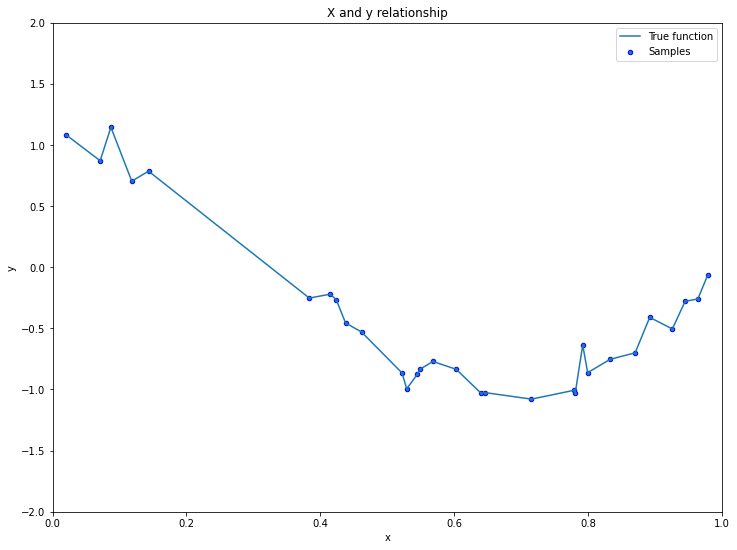

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_train_samples, n_test_samples = 30, 10

X_train = np.sort(np.random.rand(n_train_samples))
y_train = true_fun(X_train) + np.random.randn(n_train_samples) * 0.1

print(X_train.shape, y_train.shape)

def plot(X, y, figure=(12, 9)):
  plt.figure(figsize=figure)
  plt.plot(X, y, label='True function')
  plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.legend(loc='best')
  plt.title('X and y relationship')
  
plot(X_train, y_train)

Thành phần sai số $\epsilon_i$ được thêm vào mô hình nên mối quan hệ giữa $x$ và $y$ là không hoàn toàn theo phương trình cosin. Hàm $\text{cos}(1.5\pi x_i)$ chính là hàm thực tế giữa $x$ và $y$, nó tương đương với hàm $f(x)$ ở mục độ chệch và phương sai.

Tiếp theo chúng ta sẽ tìm cách xấp xỉ mối quan hệ giữa $x$ và $y$ thông qua hồi qui đa thức với các bậc cao nhất là `1, 4, 15` và đánh giá cross validation theo metric MSE cho từng trường hợp. Bạn đọc có thể tham khảo lại [phụ lục - 6.2. Đánh giá cheó (cross validation)¶
](https://phamdinhkhanh.github.io/deepai-book/ch_appendix/appendix_pipeline.html#danh-gia-cheo-cross-validation) để hiểu thêm khái niệm. Khi kết quả MSE của cross validation càng lớn thì chứng tỏ mô hình gặp hiện tượng _quá khớp_ càng nặng.

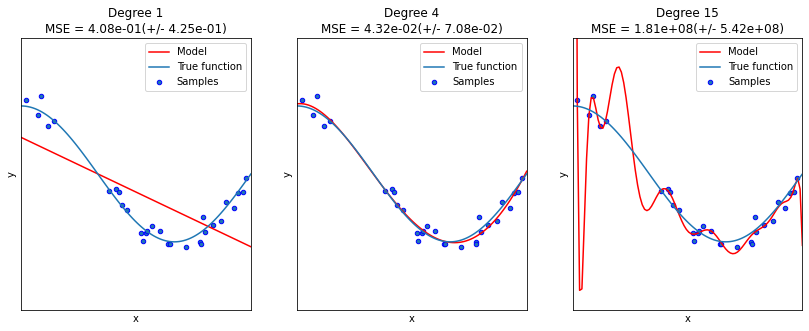

In [2]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Tạo các Featuer bậc degrees[i] cho mô hình.
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    # Hồi qui tuyến tính
    linear_regression = LinearRegression()
    
    # Pipeline đơn giản cho mô hình từ feature engineering tới hồi qui tuyến tính
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    
    # Huấn luyện mô hình
    pipeline.fit(X_train[:, np.newaxis], y_train)

    # Đánh giá mô hình sử dụng cross validation
    scores = cross_val_score(pipeline, X_train[:, np.newaxis], y_train,
                             scoring='neg_mean_squared_error', cv=10)

    # Dự báo trên tập huấn luyện
    X_test = np.linspace(0, 1, 100)
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])

    # Vẽ biểu đồ trên tập huấn luyện
    plt.plot(X_test, y_test_pred, color='r', label='Model')
    plt.plot(X_test, true_fun(X_test), label='True function')
    plt.scatter(X_train, y_train, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc='best')
    
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

Trong cả 3 mô hình trên thì bậc 15 có kết quả MSE cao nhất và đây cũng là mô hình bị _quá khớp_ nặng nhất. Đa thức bậc 15 thì có khả năng biểu diễn tốt hơn các bậc 1 và 4 nhưng quy luật mà nó học được không khái quát quy luật chung nên phương sai MSE validation cao nhất.

Đường thẳng huấn luyện bậc 1 lại thể hiện xu hướng bị chệch khỏi phương trình gốc. Chúng ta có thể thấy tín hiệu chệch qua sự khác biệt giữa đường thẳng `Model` và đường `true function`. Giá trị MSE validation của chúng mặc dù thấp hơn bậc 15 nhưng do bị chệch nên vẫn còn cao.

Chỉ có đường cong tương ứng với bậc 4 là vừa khớp tốt qui luật tổng quát trên cả tập huấn luyện và kiểm tra. Điều này được thể hiện qua MSE validation là nhỏ nhất và hình dạng đường cong rất sát với đường `true function`. Như vậy phương trình bậc 4 sẽ là lựa chọn lý tưởng nhất cho mô hình hồi qui đa thức.

## 4.2.3. Ảnh hưởng của quá khớp và vị khớp tới tác vụ dự báo

Một phương trình xảy ra _quá khớp_ hoặc _vị khớp_ đều không tốt cho tác vụ dự báo. Hiện tượng _quá khớp_ khiến mô hình chỉ khớp được tốt tập huấn luyện mà không khớp tốt các dữ liệu có phân phối khác huấn luyện. Hiện tượng _vị khớp_ sẽ tạo ra một mô hình bị chệch trên cả tập huấn luyện và kiểm tra nên thường xảy ra lỗi dự báo. Như vậy cả hai hiện tượng _quá khớp_ và _vị khớp_ đều gây ra những ảnh hưởng tiêu cực và cần được phát hiện để khắc phục.

Phương pháp sửa lỗi mô hình khi xảy ra _quá khớp_ và _vị khớp_ là khác biệt nhau. Vì vậy khi xây dựng mô hình chúng ta cần phải xác định hiện tượng mà mô hình đang mắc phải là gì trong số chúng, sau đó mới lựa chọn ra phương pháp điều chỉnh phù hợp. Trong mục tiếp theo là giới thiệu sơ bộ cách xác định _quá khớp_ và _vị khớp_ và chiến lược để khắc phục những hiện tượng này.

## 4.2.4. Cách xác định quá khớp và vị khớp.

Để đánh giá _qúa khớp_ và _vị khớp_ chúng ta sẽ so sánh thước đo (_metric_) của mô hình trên đồng thời cả hai tập huấn luyện và kiểm tra và đối chiếu chúng.

Nếu thước đo cho thấy kết quả dự báo mô hình trên tập huấn luyện **tốt hơn** so với tập kiểm tra thì ta nói mô hình gặp hiện tượng _quá khớp_. Ở đây ta dùng từ **tốt hơn** có nghĩa là thước đo đó có thể lớn hơn hoặc nhỏ hơn tuỳ thuộc vào từng loại thước đo. Chẳng hạn như thước đo là độ chính xác (_accuracy_) thì tốt hơn nghĩa là lớn hơn, còn đối với sai số MSE thì tốt hơn đồng nghĩa với nhỏ hơn.

Chênh lệch giá trị thước đo trên tập huấn luyện và kiểm tra là điều không tránh khỏi. Xác suất để thước đo đánh giá trên tập huấn luyện và kiểm tra là bằng nhau dường như là 0%. Vì thế khi nói đến hiện tượng _quá khớp_ xảy ra là chúng ta đang xét đến sai số của thước đo trên tập huấn luyện và tập kiểm tra là **chênh lệch lớn**. Ví dụ nếu thước đo độ chính xác trên tập huấn luyện đạt 95% nhưng tập kiểm tra chỉ đạt 50% thì ta có thể khẳng định mô hình đang gặp hiện tượng _quá khớp_. Nhưng nếu thước đo độ chính xác trên tập kiểm tra là 94% và không khác nhiều so với tập huấn luyện thì ta có thể coi như mô hình là vừa vặn.

Trong một khía cạnh khác, nếu _độ chính xác_ trên tập huấn luyện và tập kiểm tra đều cùng thấp, ví dụ tập huấn luyện đạt 55%, tập kiểm tra 50% thì mô hình đang gặp hiện tượng _vị khớp_.

## 4.2.5. Xử lý hiện tượng quá khớp và vị khớp

Xử lý hiện tượng _quá khớp_ và _vị khớp_ là một trong những kỹ thuật quan trọng trong quá trình xây dựng mô hình. Những kỹ thuật này là kinh nghiệm được đúc rút từ thực nghiệm và các tài liệu khoa học đáng tin cậy như cuốn [Machine Learning Yearning - Andrew Ng](https://github.com/mlbvn/ml-yearning-vn) để người xây dựng mô hình trở thành `master` khi tham gia phát triển các dự án AI thực tế.

Có nhiều phương pháp và kỹ thuật khác nhau để xử lý hiện tượng _quá khớp_ và _vị khớp_, xong chúng đều xuất phát từ hai khía cạnh đó là tập trung vào mô hình (_model centric_) hoặc tập trung vào dữ liệu (_data centric_). 

Tập trung vào mô hình là nhằm sử dụng những kiến trúc và thuật toán tốt hơn nữa để tăng hiệu suất mô hình. Ví dụ như trong bài toán phân loại của học có giám sát chúng ta có thể sử dụng những lớp mô hình có độ phức tạp cao hơn như `Random Forest, Decision Tree, SVM` thay cho những lớp mô hình độ phức tạp thấp như `Logistic Regression` như một cách tiếp cận theo hướng model centric.  

Tập trung vào dữ liệu thường được sử dụng khi đã lựa chọn được một mô hình đủ tốt, những sự thay đổi về kiến trúc của mô hình không tạo ra cải thiện thêm về hiệu suất. Khi đó cần mở rộng bộ dữ liệu cả về **chất lượng và số lượng** để tạo ra những cải thiện đột phá cho mô hình. Một trường hợp khác mà cần áp tập trung vào dữ liệu ngay từ đầu đó là bộ dữ liệu có kích thước quá nhỏ và chất lượng của bộ dữ liệu không được tốt chẳng hạn như nhiều dữ liệu khuyết (_missing data_) và điểm ngoại lệ (_outliers_). Nếu huấn luyện mô hình trên những dữ liệu kém chất lượng như vậy thì sử dụng các kiến trúc SOTA cũng không mang lại hiệu quả.

Tiếp theo chúng ta cùng tìm hiểu các phương pháp khắc phục hiện tượng _quá khớp_.

# 4.3. Xử lý hiện tượng quá khớp

## 4.3.1. Phòng tránh quá khớp trong các mô hình machine learning truyền thống

Nội dung của những phương pháp này được áp dụng trên những lớp mô hình machine learning truyền thống không bao gồm các mạng thần kinh nơ ron (_neural network_).

### 4.3.1.1. Giảm số lượng biến và sử dụng mô hình ít phức tạp

Như ví dụ về các bậc `1, 4, 15` chúng ta đã phân tích thì bậc `15` gặp hiện tượng _quá khớp_ mặc dù nó khớp rất tốt các điểm trên tập huấn luyện. Đây là một minh chứng cho thấy chúng ta thường đối mặt với hiện tượng _quá khớp_ khi xây dựng mô hình trên những bộ dữ liệu có kích thước nhỏ nhưng sử dụng những mô hình có độ phức tạp cao. Do đó một cách đơn giản để tránh _quá khớp_ là giảm nhẹ độ phức tạp của mô hình bằng cách giảm bớt số lượng tham số, số lượng biến đầu vào và chuyển sang sử dụng những mô hình ít phức tạp hơn. Chẳng hạn trong ví dụ trên chúng ta chuyển từ bậc 15 sang bậc 4 thì mô hình đã không còn gặp hiện tượng _quá khớp_ cao nữa.

### 4.3.1.2. Phương pháp điều chuẩn (_Regularization_)

Điều chuẩn cũng là một phương pháp nhằm giảm thiểu độ phức tạp của mô hình. Trong phương pháp điều chuẩn chúng ta tìm cách cộng thêm vào giá trị của hàm mất mát (_loss function_) một thành phần kiểm soát để làm cho mô hình có xu hướng học được một kết quả khái quát hơn trên bộ dữ liệu huấn luyện. Lấy ví dụ trong phương trình hồi qui tuyến tính giữa $x$ và $y$ chúng ta sẽ tìm cách tối ưu _hàm mất mát_ dạng MSE như sau:

$$\begin{eqnarray}\text{MSE}(\mathbf{x}, \mathbf{w}) & = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\hat{y_i})^2 \\
& = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\mathbf{w}^{\intercal}\mathbf{x})^2
\end{eqnarray}$$

Theo phương pháp điều chuẩn, chúng ta sẽ cùng cộng thêm một phần tử gọi là thành phần điều chuẩn (_regularization term_) vào hàm MSE.

$$\begin{eqnarray}\text{MSE}(\mathbf{x}, \mathbf{w}) & = & \frac{1}{2N}\sum_{i=1}^{N} (y_i-\mathbf{w}^{\intercal}\mathbf{x})^2 + \underbrace{\theta ~\text{R}(\mathbf{w})}_{\text{regularization term}}
\end{eqnarray}$$

_Thành phần điều chuẩn_ được cộng thêm chủ yếu là một hàm norm chuẩn $L_2$ hoặc $L_1$ của véc tơ trọng số $\mathbf{w}$ của mô hình và $\theta > 0$ là hệ số điều chuẩn. 

Ngoài ra chúng ta có thể áp dụng giá trị trọng số khác nhau cho từng trọng số $w_i$ thay vì toàn bộ đều là $\theta$. Theo phương pháp này, những biến đầu vào mà khiến cho mô hình trở nên phức tạp hơn thì sẽ được gán cho một hệ số $\theta$ lớn hơn. Ví dụ như hệ số đối với bậc cao như $x^{15}$ sẽ cao hơn so với bậc thấp như $x^2, x$ chẳng hạn.

**Bài tập:** Hãy lý giải vì sao _thành phần điều chuẩn_ lại có tác dụng làm mô hình ít phức tạp hơn và qua đó giúp giảm thiểu hiện tượng quá khớp.

## 4.3.2 Phòng tránh quá khớp trong mạng nơ ron

Quá khớp là hiện tượng thường gặp khi huấn luyện các mạng thần kinh nơ ron. Một phần nguyên nhân là bởi số lượng tham số của một mạng nơ-ron có thể lớn tuỳ ý nên hàm biểu diễn của mạng nơ-ron có khả năng biểu diễn lớn và có độ phức tạp cao. Thậm chí người ta còn chứng minh được rằng mạng nơ-ron có khả năng **xấp xỉ mọi hàm số**. Điều đó cho thấy khả năng biểu diễn của mạng nơ-ron tốt như thế nào và đây là ưu thế giúp cho hiệu suất của mô hình deep learning vượt trội hơn so với các mô hình machine learning trên những bộ dữ liệu có kích thước lớn.

<!-- ![](https://www.seekpng.com/png/full/314-3143166_deep-learning-performance-deep-learning-vs-machine-learning.png) -->

![](imgs/dl_vs_ml.png)

**Hình 3:** Hiệu suất của mô hình deep learning so với mô hình machine learning theo sự thay đổi của kích thước bộ dữ liệu. Source: [Comparision between DL vs ML](https://www.analyticsvidhya.com/blog/2017/04/comparison-between-deep-learning-machine-learning/)

Đối với những bộ dữ liệu có kích thước nhỏ thì hiệu suất giữa mạng nơ ron và các mô hình machine learning truyền thống như Logistic, kNN, SVM, Decision Tree,... không mấy khác biệt nhưng khi các bộ dữ liệu có kích thước lớn thì mạng nơ ron sẽ có hiệu suất vượt trội. Trong nhiều trường hợp bộ dữ liệu có kích thước quá nhỏ, sử dụng mạng nơ ron sẽ dẫn tới hiện tượng quá khớp. Những phương pháp bên dưới sẽ rất hữu ích để phòng tránh hiện tượng này.

### 4.3.2.1. Phương pháp dừng sớm (_Early stopping_)

Khi huấn luyện càng lâu thì giá trị _hàm mất mát_ của mô hình trên tập huấn luyện càng nhỏ và mô hình có xu hướng khớp tốt dữ liệu trên tập huấn luyện hơn. Mặc dù sai số trên tập huấn luyện có xu hướng giảm dần theo thời gian nhưng trên _tập kiểm định_ (_validation data_) điều này sẽ chưa chắc là đúng. Lý do là vì thời điểm mô hình đạt tới một độ phức tạp nhất định nó sẽ không còn khái quát hoá tốt dữ liệu kiểm định (hãy nhớ đến phương trình hồi qui bậc 15 ở ví dụ về quá khớp và vị khớp). Như vậy trên _tập kiểm định_ tới một giai đoạn epoch nào đó sai số sẽ tăng lên.

Phương pháp dừng sớm sẽ xác định đâu là epoch được lựa chọn làm điểm dừng phù hợp căn cứ vào sai số trên _tập kiểm định_. Đó là thời điểm mà sai số trên _tập kiểm định_ bắt đầu có xu hướng tăng lên. Khi đó một quyết định dừng sớm quá trình huấn luyện sẽ giúp tránh hiện tượng _quá khớp_.

<!-- ![](https://www.researchgate.net/profile/Tuan-Ho-Le-2/publication/283697186/figure/fig3/AS:348490979921923@1460098132631/Early-stopping-method.png) -->

![](imgs/Early-stopping-method.png)

**Hình 4:** Phương pháp dừng sớm (_early stopping_) được thể hiện qua sai số trên tập kiểm định bắt đầu tăng lên tại một epoch nào đó, chẳng hạn như điểm dừng (_stop training_) trong hình. Theo qui luật tổng quát, trong dài hạn sai số trên tập huấn luyện có xu hướng giảm dần theo epoch bởi quá trình huấn luyện chúng ta luôn tìm cách tối thiểu _hàm mất mát_ trên **tập huấn luyện**.

Phương pháp dừng sớm thường được áp dụng trong quá trình huấn luyện các mô hình deep learning không chỉ giảm thiểu _quá khớp_ mà còn tiết kiệm chi phí huấn luyện. Để tìm được vị trí dừng phù hợp chúng ta sẽ kiểm tra mức độ gia tăng của sai số trên _tập kiểm tra_. Điều kiện dừng được thiết lập là ngưỡng gia tăng _hàm mất mát_ của epoch sau so với epoch trước lớn hơn $\Delta_{error}$. Trong quá trình huấn luyện chúng ta cũng cần liên tục lưu lại các _checkpoint_ cho mô hình sau mỗi epoch cho tới khi đạt được điểm dừng.

### 4.3.2.2. Phương pháp dropout (_Dropout_)

Phương pháp dropout sẽ tìm cách làm đơn giản hoá mô hình dự báo thông qua việc loại bỏ một số trọng số của mô hình thông qua mẹo thiết lập giá trị của chúng về 0 trong một vài lượt huấn luyện. Các tham số được lựa chọn để loại bỏ là ngẫu nhiên theo một tỷ lệ được xác định sẵn trên các layers được chọn, thường là những layers tại vị trí đầu tiên hoặc vị trí cuối cùng. Quá trình suy luận (_inference_) thì chúng ta sẽ lấy toàn bộ trọng số của mô hình mà không loại bỏ.

<!-- ![](https://www.tech-quantum.com/wp-content/uploads/2018/11/1_iWQzxhVlvadk6VAJjsgXgg1.png) -->
![](imgs/dropout.png)

**Hình 5:** Phương pháp dropout được áp dụng trên mạng nơ ron. Mạng nơ ron sẽ bao gồm nhiều layers mỗi layer gồm nhiều units. Các trọng số mô hình được thể hiện bởi một mũi tên liên kết units giữa các layers. Hình bên phải là toàn bộ mạng được sử dụng trong quá trình _suy luận_. Trong khi hình bên trái là áp dụng dropout trên các layers của mạng và chỉ được áp dụng trong quá trình _huấn luyện_. Trọng số mô hình bị loại bỏ được thể hiện qua những kết nối mũi tên bị xoá bỏ đi. Mô hình mới được tạo thành để huấn luyện sẽ trở nên thưa hơn, đồng thời mức độ phức tạp giảm nhằm giúp giảm _quá khớp_. Ngoài ra việc lựa chọn tham số để loại bỏ là ngẫu nhiên nên kiến trúc mô hình dropout được biến đổi rất đa dạng. Như vậy mô hình sau cùng thu được về bản chất là một sự kết hợp (_ensembling_) của các mô hình dự báo. 

Mỗĩ một lượt huấn luyện chúng ta loại bỏ một tỷ lệ thiểu số các trọng số mô hình thì sẽ tạo ra một mô hình mới ít phức tạp hơn. Như vậy mô hình được huấn luyện theo kỹ thuật này sẽ là kết hợp của rất nhiều các mô hình biến thể sau dropout và chúng ta có thể xem chúng như là một phương pháp kết hợp mô hình (_ensemble model_) nhằm giảm _quá khớp_.

Trong mạng nơ ron thì dropout thường được áp dụng tại các vị trí layers đầu tiên và layers cuối cùng. Khi áp dụng chúng ta cần xác định một tỷ lệ dropout rate qui định phần trăm các trọng số sẽ bị loại bỏ khỏi từng layer. Đối với layer đầu tiên thì các low-level features còn thô (chưa tốt) nên tỷ lệ loại bỏ có thể được thiết lập cao hơn chẳng hạn từ 0.7-0.8, nhưng đối với layer cuối cùng là những high-level features tốt và cần thiết cho quá trình dự báo nên dropout rate được thiết lập thấp hơn (từ 0.1-0.5).

# 4.4. Xử lý hiện tượng vị khớp

Để xử lý hiện tượng vị khớp chúng ta có thể tập trung vào dữ liệu hoặc mô hình. Cùng phân tích những phương pháp này như bên dưới.

## 4.4.1. Bổ sung dữ liệu cho mô hình

Bổ sung dữ liệu cho mô hình là một chiến lược lâu dài và tốn kém hơn so với việc thay đổi kiến trúc. Nhưng dường như nó lại là phương pháp mang lại hiệu quả lớn hơn so với thay đổi kiến trúc.

Sở dĩ chúng ta nói bổ sung dữ liệu tốn kém hơn so với thay đổi kiến trúc là bởi nguồn open source của các mô hình deep learning hiện tại rất dồi dào. Chúng ta có thể dễ dàng tham khảo và kế thừa lại trong các tác vụ của mình trong một thời gian ngắn. Quá trình này đơn giản và tốn ít công sức hơn nhiều so với đầu tư công phu vào làm dữ liệu.

Bên cạnh đó các mô hình deep learning nhỏ với kích thước vài triệu tham số cũng có thể đủ để biểu diễn tốt các tập dữ liệu lớn. Khi dữ liệu được cải thiện và bổ sung thì hiệu suất của những mô hình có backbone nhẹ vài triệu tham số có thể vượt xa những backbone nặng vài chục triệu hoặc thậm chí vài trăm triệu tham số nhưng chỉ được huấn luyện trên những bộ dữ liệu nhỏ. Như vậy ở thời điểm dữ liệu đang còn thiếu và ít thì tập trung vào dữ liệu sẽ mang lại hiệu suất lớn hơn so với tập trung vào cải thiện kiến trúc mô hình.

Quá trình bổ sung dữ liệu cho mô hình sẽ bao gồm thu thập và gán nhãn dữ liệu. Những dữ liệu cần thu thập nên bao quát những tình huống hiếm có (_edge cases_) mà mô hình cần bao phủ được để cải thiện chất lượng của chúng. Trong giai đoạn gán nhãn, để tiết kiệm chi phí gán nhãn thì chúng ta có thể sử dụng các mô hình được huấn luyện trên những backbone mạnh để có pretrained-label tốt hơn. Mô hình được dùng cho pretrained-label có thể rất lớn mà không cần quan tâm tới chi phí tính toán và khả năng triển khai trên thiết bị edge devices vì mục tiêu của chúng không phải là triển khai những mô hình này mà chỉ là tạo ra nhãn gợi ý tốt cho gán nhãn.

## 4.4.2. Tăng cường dữ liệu (Augumentation)

Tăng cường dữ liệu là một nguyên tắc bổ sung dữ liệu với một chi phí rẻ. Theo phương pháp này, từ một quan sát chúng ta sẽ nhân bản thành nhiều quan sát bằng cách áp dụng các kỹ thuật biến đổi mà giá trị sau biến đổi của chúng có thể mô phỏng lại một cách tương đối chính xác và đa dạng các trường hợp thực tế.

**Tăng cường dữ liệu trong Computer Vision và NLP**

Trong xử lý ảnh chúng ta có thể áp dụng phương pháp tăng cường dữ liệu như: _Random Augumentation, Cutout, CutMix, Mixup, ..._


![](https://i.imgur.com/sqj4GxG.png)

**Hình 6**: Các hình ảnh minh hoạ `Random Augumentation`. Source: [Augumentation Image - Stanford Edu](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-deep-learning-tips-and-tricks)

* Random Augumentation: Là việc áp dụng tập hợp các phương pháp biến đổi hình ảnh như Shift (dịch chuyển ảnh), Rotation (xoay ảnh), Bright Contrast (tạo tương phản màu sắc),.... một cách ngẫu nhiên. Phương pháp này sẽ tạo ra thay đổi trên ảnh đầu vào mà không thay đổi nhãn của ảnh.


![](https://i.imgur.com/JgaeJew.png)

**Hình 7**: Các hình ảnh minh hoạ `Cutout, Mixup` và `cutmix`. Source: [Paper: CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features](https://arxiv.org/abs/1905.04899v1)

* Cutout: Phương pháp này sẽ tạo ra ảnh mới, không thay đổi nhãn của ảnh bằng cách loại bỏ những vùng ô vuông trên một ảnh một cách ngẫu nhiên. Tỷ lệ diện tích các vùng ô vuông này chiếm một phần nhỏ diện tích toàn bộ ảnh.

* Mixup: Đây là phương pháp tạo ra những nhãn mềm (_soft label_) cho ảnh bằng cách hỗn hợp hai bức ảnh thuộc về hai classes khác nhau bằng một kết hợp tuyến tính giữa chúng. Nhãn mới được tạo thành sẽ là một kết hợp tuyến tính giữa chúng, nhãn này có giá trị thể hiện sự lưỡng lự giữa các class khi không nghiêng hẳn về một class nào.

Ví dụ nếu bạn có $\mathcal{I}_0$ là ảnh mèo nhãn 0 và $\mathcal{I}_{1}$ là ảnh chó nhãn 1 thì ảnh mới tạo thành sẽ lấy 90% thông tin từ mèo và 10% thông tin từ ảnh chó theo kết hợp tuyến tính: 

$$\mathcal{I}_{aug} = 0.9 \times \mathcal{I}_0 + 0.1 \times \mathcal{I}_{1}$$

Ảnh mới $\mathcal{I}_{aug}$ có nhãn là: 

$$y_{aug} = 0.9 \times y_0 + 0.1 \times y_1 = 0.9$$

Nhãn này không bị cứng nhắc, tức là chỉ thuộc về một trong hai giá trị $\{0, 1\}$ mà có thể thay đổi đa dạng trong khoảng $[0, 1]$ nên tạo ra một sự linh hoạt nhất định về nhãn. Do đó ta gọi chúng là nhãn mềm.

* CutMix: Phương pháp này vừa là kết hợp giữa Cutout và Mixup. Theo đó chúng ta thay thế những ô vuông trên một ảnh bằng những ô vuông có cùng diện tích của một ảnh khác thuộc các nhãn còn lại. Nhãn mới được tạo thành cũng là nhãn mềm được kết hợp tuyến tính từ hai nhãn.

Trong NLP chúng ta có thể tăng cường dữ liệu bằng cách thay thế một số từ trong câu tại các vị trí ngẫu nhiên bằng những từ đồng nghĩa. Đối với bài toán phân loại văn bản thì đảo lộn vị trí các câu trong đoạn văn để tạo thành đoạn văn mới có cùng nhãn. Việc tận dụng các mô hình dịch máy cũng có thể giúp tạo ra một phương pháp augumentation hiệu quả. Theo phương pháp này, từ một câu gốc A Tiếng Việt chúng ta có thể dịch sang câu B Tiếng Anh và sau đó dịch ngược trở lại từ câu B Tiếng Anh sang câu A' Tiếng Việt là một biến thể có nội dung tương tự như câu gốc A.

**Tăng cường dữ liệu đối với tabular data**

Các bài toán phân loại đối với dữ liệu dạng bảng (_tabular dataset_) thường sử dụng những phương pháp sinh mẫu như SMOTE (_Synthetic Minority Oversampling Technique_), Random Sampling để tăng cường dữ liệu. Sinh mẫu thường được áp dụng và tỏ ra hiệu quả trong các trường hợp xảy ra hiện tượng mất cân bằng dữ liệu trầm trọng, khi đó chúng ta thường áp dụng sinh mẫu trên những nhóm thiểu số.

* Random Sampling: Chúng ta sẽ lấy mẫu lặp lại một cách ngẫu nhiên. Các mẫu được sinh ra là các sao chép ngẫu nhiên từ những mẫu cũ.

* SMOTE: Phương pháp này sẽ tạo ra những mẫu mới dựa trên những phân phối của những mẫu gần nó nhất. Mẫu mới được tạo thành có thể được lấy bằng trung bình có trọng số hoặc không có trọng số trên $k$ mẫu cùng nhãn gẫn nhất.

## 4.4.3. Sử dụng thuật toán phức tạp hơn

Phương pháp này là một hướng cải thiện dựa trên mô hình. Đối với những bộ dữ liệu kích thước lớn mà mô hình có hiệu suất thấp thì chúng ta có thể chuyển sang những thuật toán phức tạp hơn.

Trong các mô hình phân loại thuộc lớp mô hình học có giám sát của machine learning thì những mô hình được coi là phức tạp hơn thường là `Random Forest, Decision Tree, MLP, SVM` và ít phức tạp là `Logistic, Naive Bayes, k-NN`.

Đối với Deep Learning thì các kiến trúc phức tạp hơn được thể hiện qua độ sâu lớn hơn, số lượng tham số lớn hơn. Ngày nay cùng với sự phát triển mạnh mẽ của nghiên cứu, thực nghiệm và dữ liệu lớn khiến cho các kiến trúc của Deep Learning trở nên vô cùng dồi dào và đa dạng. Do đó thật khó để chúng ta nói đâu là một backbone hiệu quả nhất bởi thứ hạng chúng thường thay đổi theo thời gian. Thứ hạng chính của những backbones có thể được tìm kiếm tại leaderboard trên các tập dataset chuẩn như [ImageNet Leader Board](https://paperswithcode.com/sota/image-classification-on-imagenet).

Trong NLP thì các lớp mô hình pretrain chủ yếu là BERT và các biến thể của BERT được công khai trên [huggingface hub](https://huggingface.co/models). Tại đây bạn có thể tìm được các mô hình biểu diễn ngôn ngữ tốt cho cả mono-language và multi-language. Mô hình pretrain cho Tiếng Việt nổi tiếng là [PhoBERT](https://github.com/VinAIResearch/PhoBERT).

# 4.5. Tổng kết

_quá khớp_ và _vị khớp_ là những nguyên nhân chính khiến mô hình không còn đúng khi áp dụng vào bài toán dự báo thực tế. Hiểu và nắm vững những đặc điểm về chúng và cách thức khắc phục sẽ giúp tạo ra những mô hình tốt hơn. Như vậy chương này chúng ta đã thu thập thêm được những kiến thức mới:

1. Độ chệch và độ biến động là gì ? Đánh đổi giữa độ chệch và độ biến động trong quá trình xây dựng mô hình.
2. Các hiện tượng _quá khớp_ và _vị khớp_ cùng hậu quả của chúng.
3. Các phương pháp giảm thiểu _quá khớp_ đối với mô hình machine learning và mạng nơ ron.
4. Các phương pháp giảm thiểu _vị khớp_.

# 4.6. Bài tập tham khảo

1. _quá khớp_ là gì ? _vị khớp_ là gì ? Khác biệt chính giữa chúng là gì ?
2. Ảnh hưởng của hiện tượng _quá khớp_ và _vị khớp_ là gì ?
3. Khi mô hình xảy ra hiện tượng _quá khớp_, có những chiến lược nào để khắc phục?
4. Khi mô hình xảy ra hiện tượng _vị khớp_, chúng ta cần sử dụng chiến lược gì?
5. Làm sao để kiểm tra một mô hình có gặp hiện tượng _quá khớp_ hay không nếu bạn chỉ có một tập huấn luyện.
6. Trong phương pháp dừng sớm (_early stopping_) thì điều kiện dừng là gì ?
7. Phương pháp điều chuẩn (_regularization_) sẽ làm gì để giảm bớt _quá khớp_?
8. Những phương pháp học tăng cường dữ liệu chính đối với các mô hình phân loại ảnh là gì ?
9. Hãy xây dựng và huấn luyện một mô hình phân loại trên bộ dữ liệu [breast cancer](https://github.com/phamdinhkhanh/datasets/blob/master/breastcancer_training.csv). Nhận xét xem mô hình đang gặp hiện tượng _quá khớp_ hay _vị khớp_?
10. Thực hành khắc phục hiện tượng xảy ra của mô hình ở câu 9.

# 4.7. Tài liệu tham khảo

1. [Understand the bias and variance trade-off](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

2. [Bias and Variance trade off](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

3. [Andrew Ng - Problem of Overfitting](https://www.youtube.com/watch?v=u73PU6Qwl1I)

4. [Overfitting and Underfitting with machine learning algorithms](https://machinelearningmastery.com/Overfitting-and-underfitting-with-machine-learning-algorithms/)